In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Crop_recommendation.csv")


In [3]:
dataset.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [4]:



dataset["label"].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
dataset.drop(columns="rainfall",inplace=True)

In [6]:
dataset["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
dataset.describe()

,N,P,K,temperature,humidity,ph
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091


In [8]:
dataset.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [9]:
dataset.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
dataset.duplicated().sum()

0

In [11]:
crop_dict={
'rice':1,
'maize':2, 
'chickpea':3, 
'kidneybeans':4, 
'pigeonpeas':5,
       'mothbeans':6,
'mungbean':7, 
'blackgram':8, 
'lentil':9, 
'pomegranate':10,
       'banana':11,
'mango':12, 
'grapes':13, 
'watermelon':14,
'muskmelon':15, 
'apple':16,
 'orange':17, 
'papaya':18, 
'coconut':19, 
'cotton':20, 'jute':21, 'coffee':22
}

In [12]:
dataset["label"]=dataset["label"].map(crop_dict)

In [13]:
dataset.head()

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,1
1,85,58,41,21.770462,80.319644,7.038096,1
2,60,55,44,23.004459,82.320763,7.840207,1
3,74,35,40,26.491096,80.158363,6.980401,1
4,78,42,42,20.130175,81.604873,7.628473,1


In [14]:
x=dataset.iloc[:,:-1]
y=dataset.label

In [15]:
x,y

(        N   P   K  temperature   humidity        ph
 0      90  42  43    20.879744  82.002744  6.502985
 1      85  58  41    21.770462  80.319644  7.038096
 2      60  55  44    23.004459  82.320763  7.840207
 3      74  35  40    26.491096  80.158363  6.980401
 4      78  42  42    20.130175  81.604873  7.628473
 ...   ...  ..  ..          ...        ...       ...
 2195  107  34  32    26.774637  66.413269  6.780064
 2196   99  15  27    27.417112  56.636362  6.086922
 2197  118  33  30    24.131797  67.225123  6.362608
 2198  117  32  34    26.272418  52.127394  6.758793
 2199  104  18  30    23.603016  60.396475  6.779833
 
 [2200 rows x 6 columns],
 0        1
 1        1
 2        1
 3        1
 4        1
         ..
 2195    22
 2196    22
 2197    22
 2198    22
 2199    22
 Name: label, Length: 2200, dtype: int64)

In [16]:
x=np.array(x)
y=np.array(y)

In [17]:
x,y

(array([[ 90.        ,  42.        ,  43.        ,  20.87974371,
          82.00274423,   6.50298529],
        [ 85.        ,  58.        ,  41.        ,  21.77046169,
          80.31964408,   7.03809636],
        [ 60.        ,  55.        ,  44.        ,  23.00445915,
          82.3207629 ,   7.84020714],
        ...,
        [118.        ,  33.        ,  30.        ,  24.13179691,
          67.22512329,   6.36260785],
        [117.        ,  32.        ,  34.        ,  26.2724184 ,
          52.12739421,   6.75879255],
        [104.        ,  18.        ,  30.        ,  23.60301571,
          60.39647474,   6.77983261]]),
 array([ 1,  1,  1, ..., 22, 22, 22], dtype=int64))

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
x_test,x_train

(array([[101.        ,  17.        ,  47.        ,  29.49401389,
          94.72981338,   6.18505323],
        [ 98.        ,   8.        ,  51.        ,  26.1793464 ,
          86.52258079,   6.25933595],
        [ 59.        ,  62.        ,  49.        ,  43.36051537,
          93.35191636,   6.94149681],
        ...,
        [121.        ,  47.        ,  16.        ,  23.60564038,
          79.29573149,   7.72324015],
        [116.        ,  52.        ,  19.        ,  22.94276687,
          75.37170612,   6.11452588],
        [  5.        ,  68.        ,  20.        ,  19.04380471,
          33.10695144,   6.12166671]]),
 array([[ 17.        ,  16.        ,  14.        ,  16.39624284,
          92.18151927,   6.62553865],
        [ 37.        ,  79.        ,  19.        ,  27.54384835,
          69.3478631 ,   7.14394276],
        [  7.        ,  73.        ,  25.        ,  27.52185591,
          63.13215259,   7.28805662],
        ...,
        [ 11.        ,  36.        ,  31.    

In [21]:
x_test.shape

(440, 6)

In [22]:
x_train.shape

(1760, 6)

In [23]:
y_test.shape

(440,)

In [24]:
y_train.shape

(1760,)

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
mx=MinMaxScaler()

In [27]:
x_train=mx.fit_transform(x_train)
x_test=mx.transform(x_test)

In [28]:
x_train,x_test

(array([[0.12142857, 0.07857143, 0.045     , 0.21723408, 0.9089898 ,
         0.48532225],
        [0.26428571, 0.52857143, 0.07      , 0.53710965, 0.64257946,
         0.56594073],
        [0.05      , 0.48571429, 0.1       , 0.53647858, 0.57005802,
         0.58835229],
        ...,
        [0.07857143, 0.22142857, 0.13      , 0.54792131, 0.43760347,
         0.46198144],
        [0.07857143, 0.85      , 0.995     , 0.1321158 , 0.76763665,
         0.44420505],
        [0.22857143, 0.52142857, 0.085     , 0.43458302, 0.56099735,
         0.54465022]]),
 array([[0.72142857, 0.08571429, 0.21      , 0.59306878, 0.93872187,
         0.41682113],
        [0.7       , 0.02142857, 0.23      , 0.49795587, 0.84296447,
         0.42837304],
        [0.42142857, 0.40714286, 0.22      , 0.99096186, 0.92264534,
         0.5344578 ],
        ...,
        [0.86428571, 0.3       , 0.055     , 0.42410452, 0.75864563,
         0.6560289 ],
        [0.82857143, 0.33571429, 0.07      , 0.40508367, 0.712

In [29]:
x_train.shape,y_train.shape

((1760, 6), (1760,))

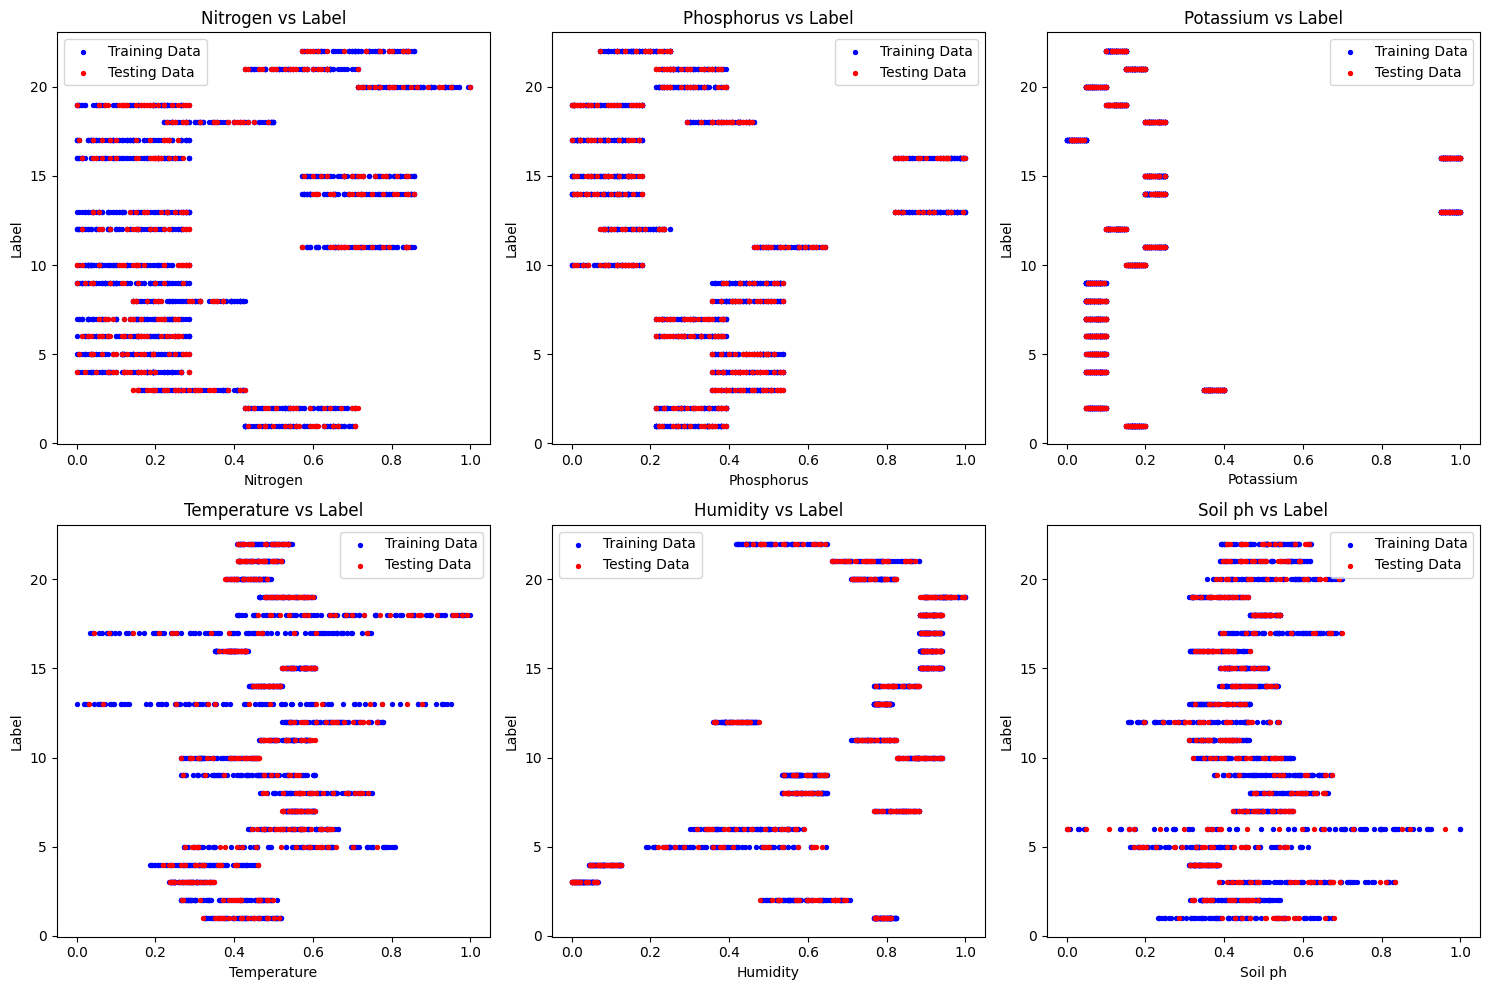

In [30]:

feature_names = ["Nitrogen", "Phosphorus", "Potassium", "Temperature", "Humidity", "Soil ph"]  
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.ravel()  # Flatten the 2D array of axes

for i, column in enumerate(feature_names):
    axes[i].scatter(x_train[:, i], y_train, c='b', s=8, label='Training Data')
    axes[i].scatter(x_test[:, i], y_test, c='r', s=8, label='Testing Data')
    
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Label')
    axes[i].set_title(f'{column} vs Label')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [32]:
model={
    'logesticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'KNeighbour':KNeighborsClassifier(),
    'svc':SVC(),
    'GaussianNB':GaussianNB(),
    'random':RandomForestClassifier()
}

In [33]:
for name,m in model.items():
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    print(f"{name } model with accuracy score: {score}")
    

logesticRegression model with accuracy score: 0.8568181818181818
DecisionTreeClassifier model with accuracy score: 0.9590909090909091
KNeighbour model with accuracy score: 0.925
svc model with accuracy score: 0.925
GaussianNB model with accuracy score: 0.9590909090909091
random model with accuracy score: 0.975


In [34]:
rand=RandomForestClassifier()


In [35]:
rand.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred1=rand.predict(x_test)

In [37]:
y_pred1

array([15, 14, 18, 18, 16, 12, 16,  6,  7,  9,  8, 19, 10, 21, 19, 10, 16,
        2, 18, 15, 22, 18, 17, 18,  3, 21,  7, 17,  5,  1, 10,  6, 21,  9,
       21,  8, 21,  3,  3,  4, 18, 12,  8,  2,  7,  2,  5, 19, 15,  2,  8,
       22, 13,  7, 22,  4, 20, 16, 11,  9, 14, 19,  9, 17, 18,  5, 17,  1,
       15,  5, 15, 19, 21, 11,  8, 18, 11, 20, 14, 17, 22,  3,  1,  6, 17,
       12, 22,  6,  8, 10,  2,  6, 20, 18,  5,  6,  4, 22,  8,  9, 19, 21,
       17, 15, 14,  4, 14, 11,  5,  6, 11, 21, 20, 10,  5,  3,  2, 19, 10,
       21,  9, 13,  8, 19,  3,  8, 19,  2, 11,  5, 11,  4, 10,  3, 19, 17,
        5, 11, 11, 16,  4, 15,  7,  5, 19,  2, 16, 19,  4,  6,  7,  9, 14,
        7,  5,  5,  5,  4,  2, 21,  3, 16, 17, 20,  1, 19, 13,  9, 14, 13,
       13,  8, 10,  3, 19,  2,  9, 13, 14, 21, 22, 22,  4, 21,  6,  4, 11,
        4, 19, 18, 18,  7, 12, 10, 14,  4,  2, 16,  8,  3, 13, 13, 11, 20,
        1, 10,  7, 11, 21,  7,  2,  3,  3,  3, 16,  1,  4, 18, 22,  8,  4,
       12, 12, 19, 18, 16

In [38]:
print("Accuracy= ",accuracy_score(y_test,y_pred1))


Accuracy=  0.975


In [39]:
print(classification_report(y_true=y_test,y_pred=y_pred1,zero_division=1))

              precision    recall  f1-score   support

           1       1.00      0.79      0.88        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        20
           5       0.91      0.91      0.91        23
           6       0.95      0.88      0.91        24
           7       1.00      1.00      1.00        19
           8       1.00      0.95      0.97        20
           9       0.73      1.00      0.85        11
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      0.95      0.97        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        23
          17       1.00      1.00      1.00        14
          18       1.00    

In [40]:
y_test_crops = [[key for key, value in crop_dict.items() if value == label][0] for label in y_test]
y_pred_crops = [[key for key, value in crop_dict.items() if value == label][0] for label in y_pred1]

print(classification_report(y_true=y_test_crops,y_pred=y_pred_crops, zero_division=1))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      1.00      0.92        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.73      1.00      0.85        11
       maize       1.00      1.00      1.00        21
       mango       1.00      0.95      0.97        19
   mothbeans       0.95      0.88      0.91        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [41]:
set(crop_dict.keys())

{'apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon'}

In [42]:
set(y_test)

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}

In [43]:
rand.score(x_train,y_train),rand.score(x_test,y_test)

(1.0, 0.975)

In [44]:
dataset.head(5)

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,1
1,85,58,41,21.770462,80.319644,7.038096,1
2,60,55,44,23.004459,82.320763,7.840207,1
3,74,35,40,26.491096,80.158363,6.980401,1
4,78,42,42,20.130175,81.604873,7.628473,1


In [45]:
rand.predict([[90,42,43,20.879744,82.002744,6.502985]])

array([16], dtype=int64)

In [46]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'label'], dtype='object')

In [47]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred1)

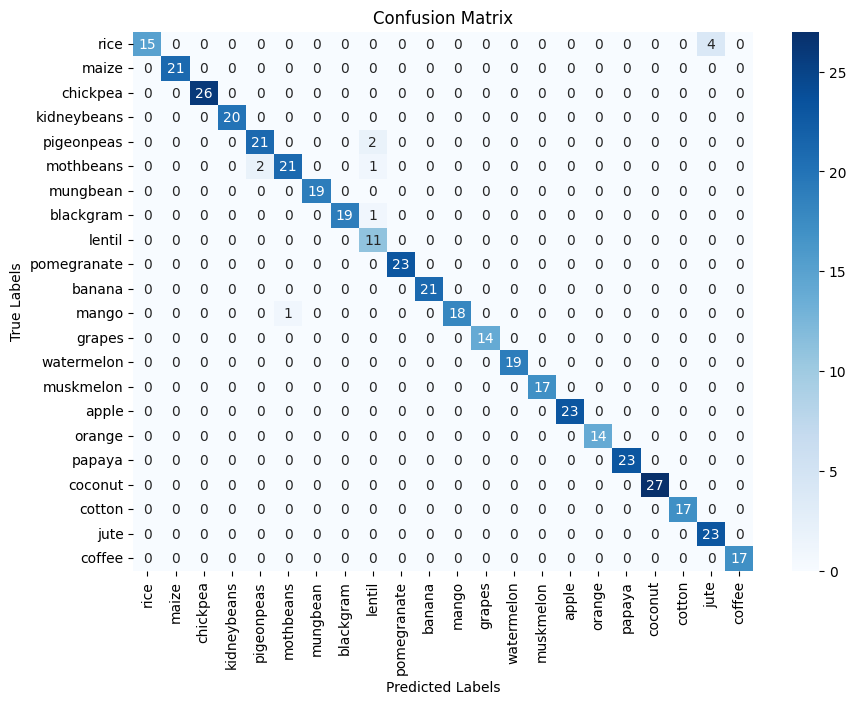

In [48]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=list(crop_dict.keys()), yticklabels=list(crop_dict.keys()))
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [49]:
def recommendation(N,P,K,temp,hum,ph):
    features=np.array([[N,P,K,temp,hum,ph]])
    mx_features=mx.transform(features)
    prediction=rand.predict(mx_features).reshape(1,-1)
    return prediction[0]
    
    

In [50]:
dataset.head(5)

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,1
1,85,58,41,21.770462,80.319644,7.038096,1
2,60,55,44,23.004459,82.320763,7.840207,1
3,74,35,40,26.491096,80.158363,6.980401,1
4,78,42,42,20.130175,81.604873,7.628473,1


In [51]:
N=90
P=42
K=43
temp=20.879744
humidity=82.002744
ph=6.502985
	
recommendation(N,P,K,temp,humidity,ph)

array([1], dtype=int64)

In [52]:
rand.predict(x_train)

array([17,  8,  9, ..., 12, 13,  9], dtype=int64)

In [53]:
import pickle

In [54]:
pickle.dump(rand,open('model_1.pkl','wb'))
pickle.dump(mx,open('scaling_1.pkl','wb'))